In [3]:
import ray_tracing
import ray_tracing_v1
import ray_tracing_v2


import matplotlib.pyplot as plt
%matplotlib inline
%reload_ext autoreload
%autoreload 2
import pickle as pkl
import numpy as np

In [4]:
theta, phi, r, depth = pkl.load(open('../../save.pkl'))

theta = theta.astype(np.float32)[:,:,:]
phi = phi.astype(np.float32)[:,:,:]
r = r.astype(np.float32)[:,:,:]
depth = depth.astype(np.float32)[:,:,:,0]


In [5]:
depth.shape

(64, 64, 128)

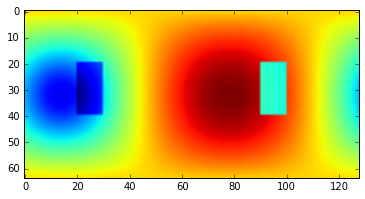

In [6]:
plt.imshow(r[0])

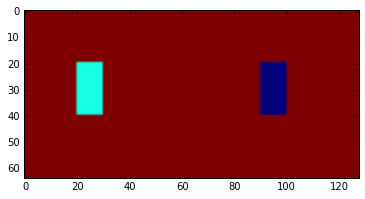

In [7]:
plt.imshow(depth[0])

In [8]:
dia = np.arctan(np.tan(np.pi/float(64)) / depth * r) / np.tan(np.pi/float(64))

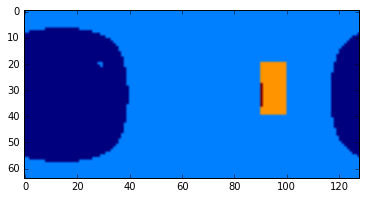

In [9]:
dia = np.ceil(dia)
plt.imshow(dia[0])

In [ ]:
def trace(theta, phi, r_np, depth, dia):
    occupancy_min_r = np.ones(theta.shape) * 10000
    occupancy_input = np.ones(theta.shape)
    occupancy = np.zeros(theta.shape)
    threshold = 0.3
    b, h, w  = theta.shape
    for i in range(b):
        for j in range(h):
            for k in range(w):
                idx1 = int((theta[i,j,k] + 1)/(2/float(h)))
                idx2 = int((phi[i,j,k] + 1)/(2/float(w)))
                d = int(dia[i,j,k])
                for padx in range(-d,d+1):
                    for pady in range(-d,d+1):
                        if 0< idx1 + padx < h and 0<idx2 + pady < w:
                            if r_np[i,j,k] < occupancy_min_r[i,idx1 + padx,idx2 + pady]:
                                occupancy_min_r[i,idx1 + padx,idx2 + pady] = r_np[i,j,k]
                                occupancy[i, idx1 + padx,idx2 + pady] = 1


    for i in range(b):
        for j in range(h):
            for k in range(w):
                idx1 = int((theta[i,j,k] + 1)/(2/float(h)))
                idx2 = int((phi[i,j,k] + 1)/(2/float(w)))
                if r_np[i,j,k] > occupancy_min_r[i,idx1,idx2]  + threshold:
                    occupancy_input[i,j,k] = 0

    return occupancy, occupancy_input

In [ ]:
time occu, occu_input = trace(theta, phi, r, depth, dia)

In [ ]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(occu[0,:,:], cmap='gray')
plt.subplot(1,2,2)
plt.imshow(occu_input[0,:,:], cmap='gray')

In [ ]:
time occu, occu_input = ray_tracing_v1.trace(theta, phi, r)

In [ ]:
dia

In [10]:
time occu, occu_input = ray_tracing_v2.trace(theta, phi, r, dia)

CPU times: user 96 ms, sys: 4 ms, total: 100 ms
Wall time: 98.8 ms


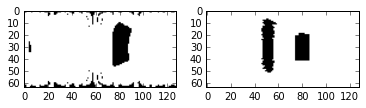

In [11]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(occu[0,:,:], cmap='gray')
plt.subplot(1,2,2)
plt.imshow(occu_input[0,:,:], cmap='gray')

In [12]:
time occu, occu_input = ray_tracing_v2.trace(theta, phi, r)

TypeError: trace() takes exactly 4 positional arguments (3 given)

In [ ]:
theta.shape

In [ ]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(occu[0,:,:], cmap='gray')
plt.subplot(1,2,2)
plt.imshow(occu_input[0,:,:], cmap='gray')